# Session 29 - Lab Challenges Statistics

### Dengan menggunakan US Superstore data kita akan melakukan beberapa analisa statistika dasar yang mencakup

- Analisa Deskriptif
- Penarikan Sample
- Uji Hipotesa

### Import Dataset (US Superstore data.xls)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Cukup/tidak cukup bukti untuk menentang H0

### No 1

Untuk semua kolom angka (nominal) : 'Sales', 'Quantity','Discount', 'Profit', lakukan analisa berikut ini :
- Berikan analisa deskriptif ukuran pemusatan data (mean, median, modus)
- Berikan analisa deskriptif ukuran persebaran data (range, IQR, variance, std)
- Bagaimana distribusi dari kolom tersebut
- Cek Outlier dari kolom tersebut

In [11]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].agg([np.mean, np.median])

,Sales,Quantity,Discount,Profit
mean,229.858001,3.789574,0.156203,28.656896
median,54.490000,3.000000,0.200000,8.666500


In [16]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].mode()

,Sales,Quantity,Discount,Profit
0,12.96,3,0.0,0.0


In [39]:
max = df[['Sales', 'Quantity', 'Discount', 'Profit']].max()
min = df[['Sales', 'Quantity', 'Discount', 'Profit']].min()
print(max - min)

Sales       22638.036
Quantity       13.000
Discount        0.800
Profit      14999.954
dtype: float64


In [43]:
q1 = df[['Sales', 'Quantity', 'Discount', 'Profit']].quantile(0.25)
q3 = df[['Sales', 'Quantity', 'Discount', 'Profit']].quantile(0.75)

q3 - q1

Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64

In [40]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].agg([np.var, np.std])

,Sales,Quantity,Discount,Profit
var,388434.455308,4.951113,0.042622,54877.798055
std,623.245101,2.225110,0.206452,234.260108


In [37]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].var()

Sales       388434.455308
Quantity         4.951113
Discount         0.042622
Profit       54877.798055
dtype: float64

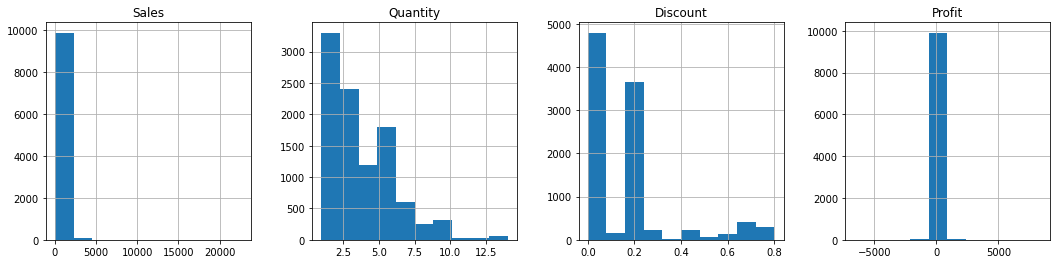

In [87]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].hist(layout=(1,4), figsize=(18,4))
plt.show()

In [58]:
# Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("- Number of Outlier From Variable {} : {}".format(sample.name, number_outlier))
    
    if number_outlier>0:
        print("  Outlier observation row:")
    else:
        pass
    out_list = []
    
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            out_list.append(i)
        elif sample[i]>upper_range:
            out_list.append(i) 
        else:
            pass
    if out_list != []:
        print(' ', out_list)

In [61]:
outlier(df['Sales'])

- Number of Outlier From Variable Sales : 1167
  Outlier observation row:
  [1, 3, 7, 10, 11, 16, 24, 27, 35, 38, 54, 67, 72, 117, 124, 125, 144, 145, 149, 159, 165, 167, 182, 189, 192, 215, 226, 232, 235, 244, 247, 251, 257, 262, 263, 270, 281, 282, 288, 299, 318, 328, 335, 338, 341, 353, 359, 369, 373, 377, 392, 399, 406, 408, 412, 424, 433, 436, 454, 457, 460, 463, 473, 480, 485, 487, 502, 509, 515, 518, 526, 529, 533, 542, 551, 554, 557, 595, 613, 623, 624, 638, 657, 659, 660, 661, 683, 708, 721, 730, 746, 753, 765, 767, 769, 777, 792, 806, 810, 814, 819, 869, 880, 893, 909, 910, 916, 924, 942, 944, 947, 948, 949, 969, 977, 980, 982, 983, 988, 990, 994, 995, 1001, 1002, 1013, 1019, 1021, 1022, 1030, 1040, 1042, 1046, 1048, 1081, 1082, 1085, 1118, 1121, 1126, 1144, 1146, 1150, 1155, 1180, 1189, 1190, 1199, 1200, 1202, 1203, 1211, 1219, 1233, 1245, 1246, 1249, 1250, 1252, 1258, 1260, 1295, 1300, 1316, 1318, 1335, 1338, 1340, 1367, 1369, 1374, 1375, 1394, 1416, 1433, 1438, 1444, 1454,

In [62]:
outlier(df['Quantity'])

- Number of Outlier From Variable Quantity : 170
  Outlier observation row:
  [113, 139, 147, 251, 329, 341, 342, 343, 375, 412, 575, 614, 651, 660, 746, 750, 856, 886, 949, 1013, 1045, 1048, 1108, 1246, 1250, 1295, 1348, 1356, 1363, 1429, 1433, 1596, 1711, 1755, 1824, 2062, 2210, 2214, 2324, 2406, 2418, 2426, 2582, 2617, 2629, 2660, 2750, 2781, 2793, 2894, 2947, 3024, 3057, 3169, 3212, 3242, 3295, 3426, 3441, 3574, 3590, 3624, 3662, 3668, 3826, 3902, 3969, 4000, 4009, 4048, 4053, 4067, 4270, 4297, 4366, 4482, 4579, 4668, 4678, 4806, 4847, 4866, 5300, 5385, 5397, 5443, 5462, 5517, 5524, 5622, 5646, 5668, 5763, 5925, 5940, 5977, 6099, 6131, 6151, 6158, 6185, 6233, 6472, 6488, 6499, 6517, 6535, 6628, 6634, 6692, 6860, 6925, 7168, 7206, 7211, 7276, 7341, 7371, 7387, 7602, 7783, 7843, 7846, 7906, 7941, 7997, 8006, 8019, 8074, 8084, 8121, 8139, 8225, 8348, 8413, 8431, 8436, 8484, 8508, 8515, 8521, 8569, 8642, 8830, 8849, 8870, 8879, 8935, 9021, 9039, 9056, 9063, 9104, 9148, 9157, 9168, 9484

In [63]:
outlier(df['Discount'])

- Number of Outlier From Variable Discount : 856
  Outlier observation row:
  [14, 15, 28, 32, 36, 75, 76, 78, 95, 101, 105, 118, 126, 169, 174, 176, 198, 203, 215, 221, 223, 230, 233, 238, 239, 242, 254, 261, 280, 286, 296, 330, 332, 333, 341, 372, 378, 380, 386, 393, 429, 434, 464, 467, 469, 500, 501, 503, 521, 536, 545, 549, 579, 584, 590, 604, 605, 607, 615, 621, 636, 655, 658, 662, 669, 676, 678, 679, 699, 700, 741, 781, 818, 820, 836, 868, 869, 878, 899, 901, 917, 934, 957, 972, 976, 978, 987, 1007, 1034, 1035, 1044, 1066, 1069, 1073, 1074, 1096, 1102, 1103, 1106, 1107, 1112, 1173, 1199, 1201, 1213, 1214, 1235, 1257, 1261, 1271, 1272, 1282, 1284, 1319, 1320, 1325, 1332, 1333, 1341, 1342, 1358, 1363, 1364, 1369, 1381, 1418, 1420, 1422, 1448, 1450, 1473, 1513, 1514, 1547, 1550, 1567, 1600, 1629, 1648, 1662, 1674, 1675, 1681, 1685, 1686, 1704, 1705, 1746, 1757, 1767, 1768, 1770, 1802, 1809, 1818, 1819, 1820, 1824, 1843, 1857, 1879, 1887, 1898, 1906, 1907, 1937, 1939, 1943, 1972, 199

In [64]:
outlier(df['Profit'])

- Number of Outlier From Variable Profit : 1881
  Outlier observation row:
  [1, 3, 7, 10, 13, 14, 24, 27, 35, 36, 38, 54, 67, 72, 84, 117, 118, 125, 144, 147, 149, 150, 159, 165, 166, 169, 174, 176, 181, 182, 189, 201, 203, 213, 215, 223, 226, 231, 232, 238, 241, 244, 247, 251, 253, 262, 263, 270, 271, 281, 286, 288, 292, 293, 296, 303, 307, 318, 319, 320, 323, 326, 328, 335, 341, 353, 359, 362, 369, 373, 377, 384, 386, 392, 399, 406, 408, 424, 426, 429, 430, 433, 437, 449, 453, 457, 460, 463, 467, 473, 480, 487, 494, 497, 509, 515, 529, 533, 536, 539, 540, 542, 545, 554, 557, 575, 587, 595, 597, 600, 613, 622, 623, 624, 630, 634, 638, 641, 651, 657, 659, 660, 661, 670, 678, 679, 683, 685, 690, 708, 712, 713, 714, 720, 721, 722, 727, 728, 730, 733, 740, 753, 755, 765, 769, 785, 791, 792, 802, 806, 810, 814, 821, 822, 829, 835, 836, 847, 869, 870, 880, 893, 909, 910, 911, 916, 923, 924, 944, 946, 948, 949, 967, 977, 980, 983, 988, 990, 994, 995, 1001, 1002, 1004, 1013, 1019, 1021, 1022

### No 2

* Lakukan Pengambilan Sample pada seluruh data (gunakan slovin formula untuk mendapatkan jumlah sample yang sesuai)
* Lakukan sampling yang mengacu pada kolom 'Segment', dimana setiap segment dilakukan sampling data sebanyak 100 raw data

### No 3

Lakukan hypothesis testing untuk menguji apakah Sales pada category Technology lebih besar dari Sales pada category Furniture

Beberapa link yang bisa jadi referensi :
- __[Statistik Parametrik dan Non Parametrik](https://www.mobilestatistik.com/parametrik-non-parametrik/)__ - Pahami model atau jenis sample nya
- __[Hypothesis Testing untuk data non-parametric](https://towardsdatascience.com/non-parametric-tests-in-hypothesis-testing-138d585c3548)__ - Cara melakukan uji hipotesa pada data non-parametric

**Apakah parametrik atau non-parametrik? Apakah kedua sampel terdistribusi normal? Apakah bentuk distribusinya tidak normal/skewed?**

#### Statement Hipotesa

H0 : Sales pada kategori teknologi sama dengan sales pada kategori furnitur

H1 : Sales pada kategori teknologi lebih dari sales pada kategori furnitur

Confidence Level : 0.01

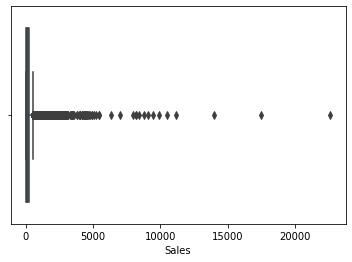

In [82]:
sns.boxplot(data=df, x='Sales')
plt.show()

In [70]:
tech_sales = df[df['Category'] == 'Technology']['Sales']
furniture_sales = df[df['Category'] == 'Furniture']['Sales']

In [99]:
print(tech_sales.std())
print(furniture_sales.std())

1108.6558482022645
503.1791448146309


#### Mencari P-Value

In [94]:
from scipy.stats import ttest_ind

In [109]:
ttest_sales = ttest_ind(tech_sales, furniture_sales, equal_var=False)
p = ttest_sales.pvalue

a = 0.01
if p >= a:
    print('Tidak cukup bukti untuk menentang H0')
else:
    print('Cukup bukti untuk menentang H0')

Cukup bukti untuk menentang H0


#### Menarik Kesimpulan

Sales kategori teknologi lebih besar dari sales kategori furnitur